<a href="https://colab.research.google.com/github/jpeoshadel/Deep-Learning-Course/blob/main/DM_Ex_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

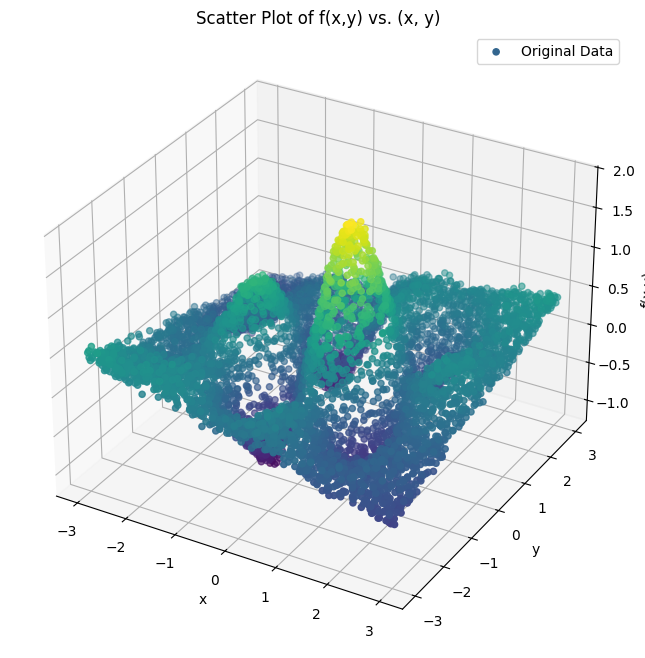

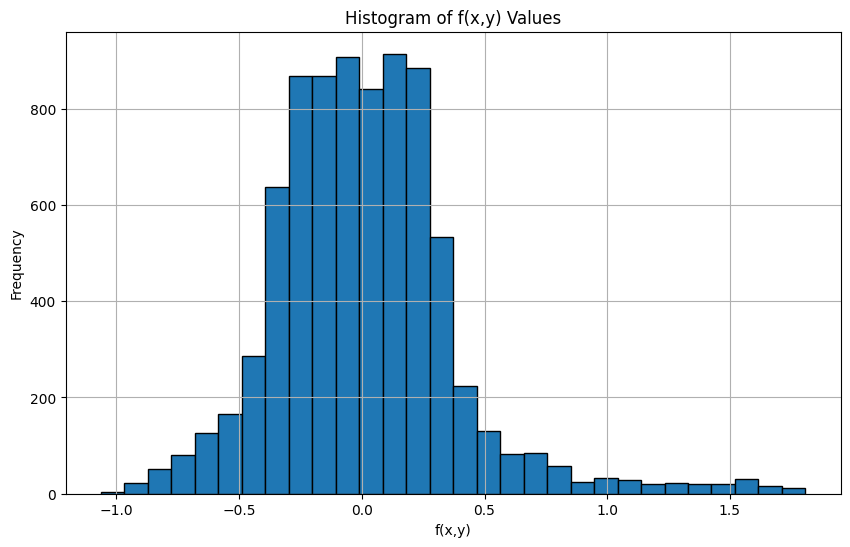

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Load and Explore the Data ---
# Note: This code assumes 'training_data.csv' is in the same directory
# and has columns named 'x', 'y', and 'f_xy'.

try:
    # Load the dataset
    data = pd.read_csv('/content/training_data.csv')
    x = data['x'].values
    y = data['y'].values
    f_xy = data['f(x,y)'].values

    # Create a scatter plot of the original data
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, f_xy, c=f_xy, cmap='viridis', label='Original Data')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title('Scatter Plot of f(x,y) vs. (x, y)')
    plt.legend()
    plt.show()


    # Plot a histogram of the f(x,y) values
    plt.figure(figsize=(10, 6))
    plt.hist(f_xy, bins=30, edgecolor='black')
    plt.title('Histogram of f(x,y) Values')
    plt.xlabel('f(x,y)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Error: 'training_data.csv' not found. Please make sure the file is in the correct directory.")
except KeyError as e:
    print(f"Error: Missing expected column in the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [16]:
# --- Step 2: Baseline Linear Regression Model ---



# We assume the 'data' DataFrame from the previous step is available

if 'data' in locals():

    # Prepare the data for scikit-learn

    X = data[['x', 'y']]

    Y = data['f(x,y)']



    # Create and fit the model

    linear_model = LinearRegression()

    linear_model.fit(X, Y)



    # Get the coefficients and intercept

    w1 = linear_model.coef_[0]

    w2 = linear_model.coef_[1]

    b = linear_model.intercept_



    print(f"--- Baseline Linear Model ---")

    print(f"The resulting equation is: f(x,y) = {w1:.4f}*x + {w2:.4f}*y + {b:.4f}")

--- Baseline Linear Model ---
The resulting equation is: f(x,y) = 0.0117*x + 0.0076*y + 0.0122


In [17]:
# --- Step 3: Build and Train a Neural Network ---



# a. Define the network architecture

class RegressionNet(nn.Module):

    def __init__(self):

        super(RegressionNet, self).__init__()

        self.layer1 = nn.Linear(2, 64) # Input layer (2 features) -> Hidden layer 1 (64 neurons)

        self.layer2 = nn.Linear(64, 32) # Hidden layer 1 -> Hidden layer 2 (32 neurons)

        self.output_layer = nn.Linear(32, 1) # Hidden layer 2 -> Output layer (1 neuron)

        self.relu = nn.ReLU()



    def forward(self, x):

        x = self.relu(self.layer1(x))

        x = self.relu(self.layer2(x))

        x = self.output_layer(x)

        return x

Epoch [10/100], Training Loss: 0.0071, Validation Loss: 0.0067
Epoch [20/100], Training Loss: 0.0046, Validation Loss: 0.0050
Epoch [30/100], Training Loss: 0.0036, Validation Loss: 0.0040
Epoch [40/100], Training Loss: 0.0035, Validation Loss: 0.0034
Epoch [50/100], Training Loss: 0.0032, Validation Loss: 0.0042
Epoch [60/100], Training Loss: 0.0032, Validation Loss: 0.0036
Epoch [70/100], Training Loss: 0.0034, Validation Loss: 0.0043
Epoch [80/100], Training Loss: 0.0032, Validation Loss: 0.0040
Epoch [90/100], Training Loss: 0.0030, Validation Loss: 0.0033
Epoch [100/100], Training Loss: 0.0030, Validation Loss: 0.0038


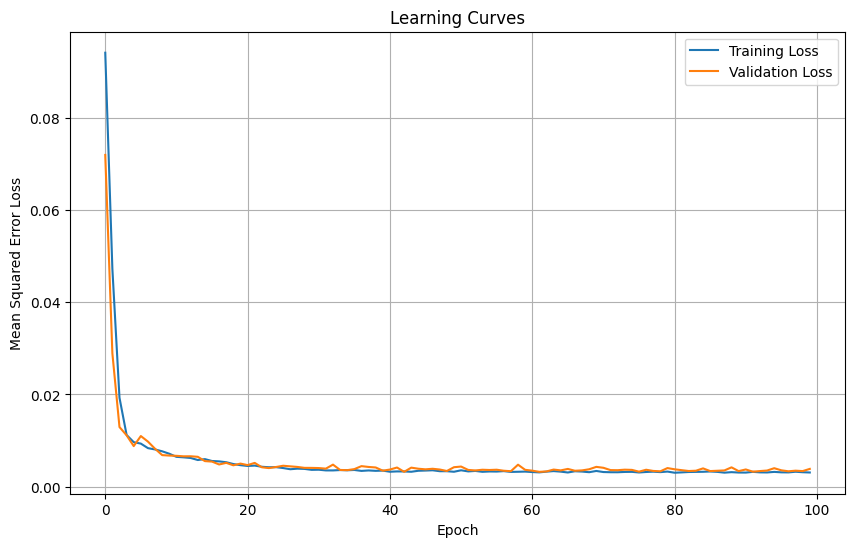

In [19]:
if 'data' in locals():

    # Prepare data for PyTorch

    X_tensor = torch.tensor(data[['x', 'y']].values, dtype=torch.float32)

    Y_tensor = torch.tensor(data['f(x,y)'].values, dtype=torch.float32).view(-1, 1)



    # Split data into training and validation sets

    X_train, X_val, y_train, y_val = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)



    train_dataset = TensorDataset(X_train, y_train)

    val_dataset = TensorDataset(X_val, y_val)



    train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

    val_loader = DataLoader(dataset=val_dataset, batch_size=32)



    # Initialize model, loss function, and optimizer

    nn_model = RegressionNet()

    criterion = nn.MSELoss() # Mean Squared Error for regression

    optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)



    # Training loop

    epochs = 100

    train_losses = []

    val_losses = []



    for epoch in range(epochs):

        # Training

        nn_model.train()

        batch_train_loss = 0

        for inputs, targets in train_loader:

            optimizer.zero_grad()

            outputs = nn_model(inputs)

            loss = criterion(outputs, targets)

            loss.backward()

            optimizer.step()

            batch_train_loss += loss.item()



        train_losses.append(batch_train_loss / len(train_loader))



        # Validation

        nn_model.eval()

        batch_val_loss = 0

        with torch.no_grad():

            for inputs, targets in val_loader:

                outputs = nn_model(inputs)

                loss = criterion(outputs, targets)

                batch_val_loss += loss.item()



        val_losses.append(batch_val_loss / len(val_loader))



        if (epoch + 1) % 10 == 0:

            print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')



    # Plot the learning curves

    plt.figure(figsize=(10, 6))

    plt.plot(range(epochs), train_losses, label='Training Loss')

    plt.plot(range(epochs), val_losses, label='Validation Loss')

    plt.title('Learning Curves')

    plt.xlabel('Epoch')

    plt.ylabel('Mean Squared Error Loss')

    plt.legend()

    plt.grid(True)

    plt.show()

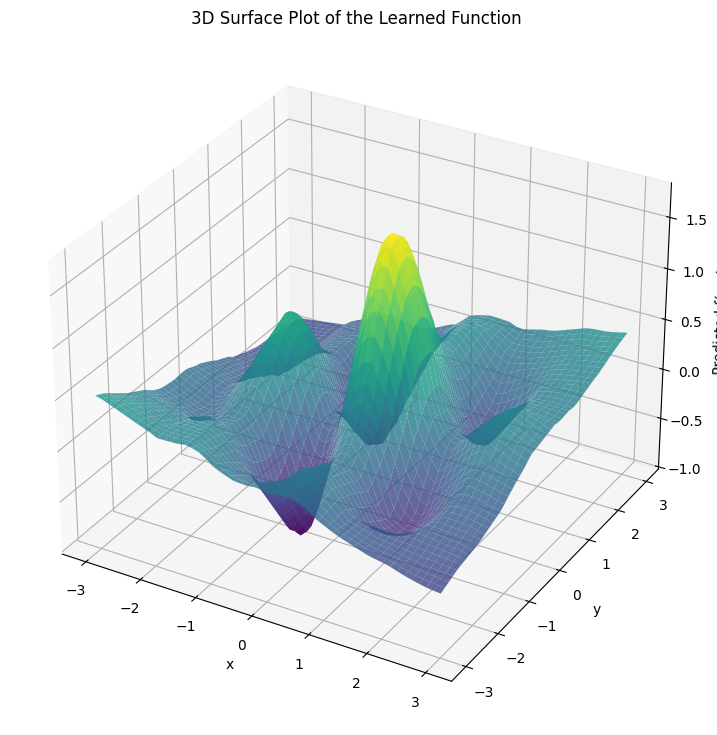

In [20]:
# --- Step 4: Prediction and Visualization ---



if 'nn_model' in locals():

    # Create a grid of points for prediction

    x_grid = np.linspace(-3, 3, 50)

    y_grid = np.linspace(-3, 3, 50)

    X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)



    # Prepare grid for PyTorch model

    grid_points = np.c_[X_mesh.ravel(), Y_mesh.ravel()]

    grid_tensor = torch.tensor(grid_points, dtype=torch.float32)



    # Make predictions

    nn_model.eval()

    with torch.no_grad():

        predictions = nn_model(grid_tensor)



    Z_mesh = predictions.numpy().reshape(X_mesh.shape)



    # Create a 3D surface plot of the learned function

    fig = plt.figure(figsize=(12, 9))

    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.8)

    ax.set_xlabel('x')

    ax.set_ylabel('y')

    ax.set_zlabel('Predicted f(x,y)')

    ax.set_title('3D Surface Plot of the Learned Function')

    plt.show()